In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Power Transforms
- Data transform = remove noise, improve signal 

### Square Root Transform
- quadratic growth trend -> linear

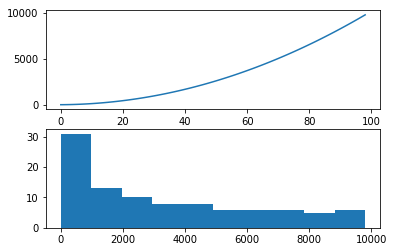

In [2]:
series = [i**2 for i in range(1,100)]
plt.figure(1)

# line plot
plt.subplot(211)
plt.plot(series)

# histogram
plt.subplot(212)
plt.hist(series)

plt.show()

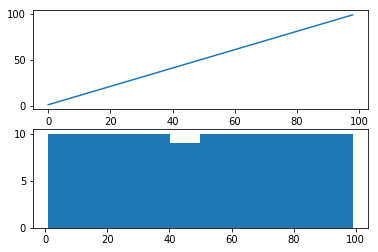

In [3]:
series = [i**2 for i in range(1,100)]

# sqrt transform
transform = series = np.sqrt(series)
plt.figure(1)

# line plot
plt.subplot(211)
plt.plot(transform)

# histogram
plt.subplot(212)
plt.hist(transform)

plt.show()

### Log Transform
- exponential distribution -> linear

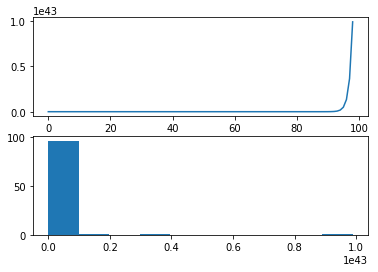

In [4]:
from math import exp

series = [exp(i) for i in range(1,100)]
plt.figure(1)

# line plot
plt.subplot(211);
plt.plot(series);

# histogram
plt.subplot(212);
plt.hist(series);

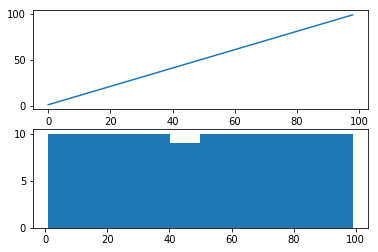

In [5]:
series = [exp(i) for i in range(1,100)]

# log transform
transform = np.log(series)
plt.figure(1)

# line plot
plt.subplot(211)
plt.plot(transform)

# histogram
plt.subplot(212)
plt.hist(transform)

plt.show()

## Apply to data

In [6]:
series = pd.read_csv(
    './data/airline-passengers.csv',
    header=0,
    index_col=0,
    parse_dates=True,
    squeeze=True)

series.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

### Raw data

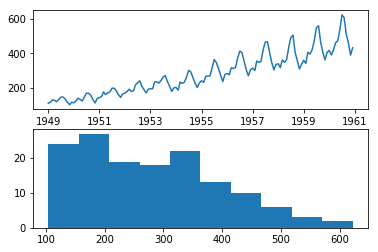

In [7]:
plt.subplot(211)
plt.plot(series)

plt.subplot(212)
plt.hist(series)
plt.show()

### Square Root Transform

In [8]:
df = pd.DataFrame(series.values)
df.columns = ['passengers']
df['passengers'] = np.sqrt(df['passengers'])

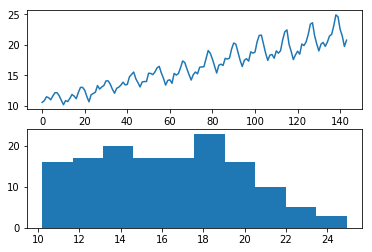

In [9]:
plt.figure(1)

# line plot
plt.subplot(211)
plt.plot(df['passengers'])

# histogram
plt.subplot(212)
plt.hist(df['passengers'])

plt.show()

### Log Transform

In [10]:
df = pd.DataFrame(series.values)
df.columns = ['passengers']
df['passengers'] = np.log(df['passengers'])

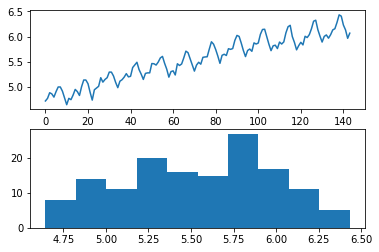

In [11]:
plt.figure(1)

# line plot
plt.subplot(211)
plt.plot(df['passengers'])

# histogram
plt.subplot(212)
plt.hist(df['passengers'])

plt.show()

### Box-Cox Transform
- Box-Cox =
	+ square root and log transform
	+ transforms automatically and select a best fit.
	+ resulting series = more linear
	+ resulting distribution = more Gaussian or Uniform
- Argument of Box-Cox lambda
	- lambda = -1.: a reciprocal transform.
	- lambda = -0.5: a reciprocal square root transform.
	- lambda = 0.0: a log transform.
	- lambda = 0.5: a square root transform.
	- lambda = 1.0: no transform.

In [12]:
from scipy.stats import boxcox

In [13]:
# Log transform lambda = 0
df = pd.DataFrame(series.values)
df.columns = ['passengers']
df['passengers'] = boxcox(df['passengers'], lmbda=0.0)

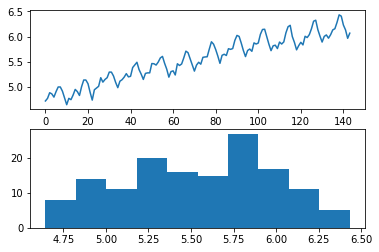

In [14]:
plt.figure(1)

# line plot
plt.subplot(211)
plt.plot(df['passengers'])

# histogram
plt.subplot(212)
plt.hist(df['passengers'])

plt.show()

In [15]:
# Autotune choosing lambda
df = pd.DataFrame(series.values)
df.columns = ['passengers']
df['passengers'], lam = boxcox(df['passengers'])
print('Lambda: %f' % lam)

Lambda: 0.148023


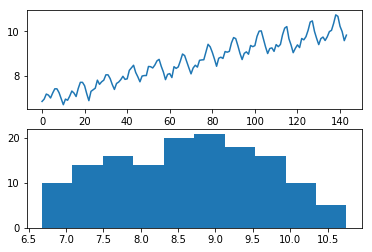

In [16]:
plt.figure(1)

# line plot
plt.subplot(211)
plt.plot(df['passengers'])

# histogram
plt.subplot(212)
plt.hist(df['passengers'])

plt.show()